In [1]:
#
#RJS-0019
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '0019';name1 = 'rjs'+name0;name2 = 'rjs-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/RJS0019.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)
print (prof)

9191 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
7.0 - número de colunas

2950.0556 89.6892 47.6619 1.6056 25.5966 2.4167
2974.7444 3083.558 3103.5224
[ 2950.0556  2950.208   2950.3604 ...,  3149.6996  3149.852   3150.0044]


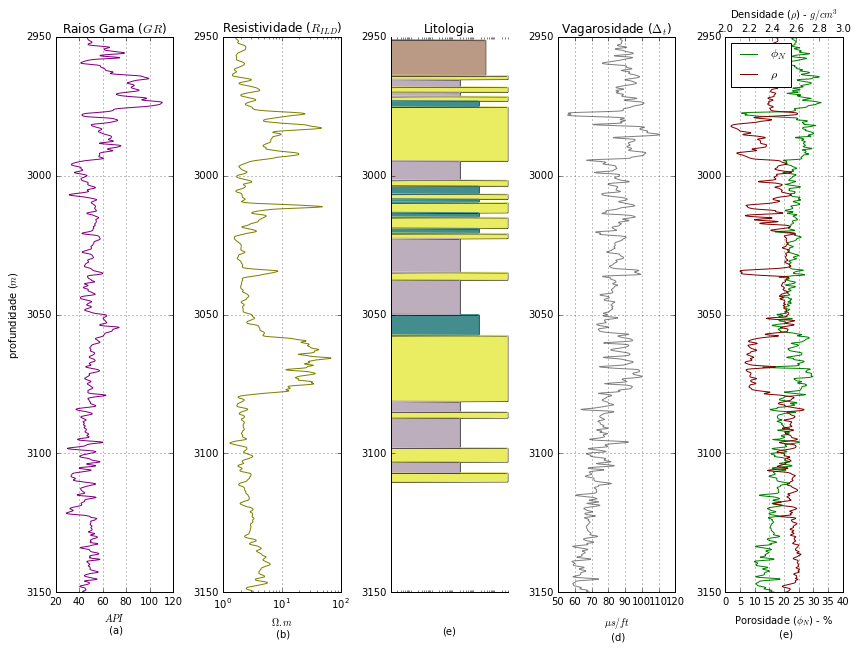

In [2]:
#
#Litologia
#
are = [0]*p;sil = [0]*p;mar = [0]*p;arg = [0]*p;mao = [0]*p

for i in range (p):
    if prof[i] >= 2951 and prof[i] < 2963.7725:sil[i] = 70
    #------------------------------------------#
    if prof[i] >= 2963.7725 and prof[i] < 2965.2695:are[i] = 90
    if prof[i] >= 2967.9640 and prof[i] < 2969.7605:are[i] = 90
    if prof[i] >= 2971.2575 and prof[i] < 2973.0539:are[i] = 90
    if prof[i] >= 2975.1497 and prof[i] < 2994.6108:are[i] = 90
    if prof[i] >= 3001.4970 and prof[i] < 3003.5928:are[i] = 90
    if prof[i] >= 3006.5868 and prof[i] < 3008.3832:are[i] = 90
    if prof[i] >= 3009.5808 and prof[i] < 3013.1737:are[i] = 90
    if prof[i] >= 3014.9701 and prof[i] < 3018.8623:are[i] = 90
    if prof[i] >= 3020.6587 and prof[i] < 3022.4551:are[i] = 90
    if prof[i] >= 3034.7305 and prof[i] < 3037.4252:are[i] = 90
    if prof[i] >= 3057.4850 and prof[i] < 3081.1377:are[i] = 90
    if prof[i] >= 3085.0299 and prof[i] < 3087.1257:are[i] = 90
    if prof[i] >= 3098.0000 and prof[i] < 3103.0000:are[i] = 90
    if prof[i] >= 3107.0000 and prof[i] < 3110.1796:are[i] = 90
    #------------------------------------------#
    if prof[i] >= 2973.0539 and prof[i] < 2975.1497:arg[i] = 50
    if prof[i] >= 3003.5928 and prof[i] < 3006.5868:arg[i] = 50
    if prof[i] >= 3008.3832 and prof[i] < 3009.5808:arg[i] = 50
    if prof[i] >= 3013.1737 and prof[i] < 3014.9701:arg[i] = 50
    if prof[i] >= 3018.8623 and prof[i] < 3020.6587:arg[i] = 50
    if prof[i] >= 3050.0000 and prof[i] < 3057.4850:arg[i] = 50
    #------------------------------------------#
    if prof[i] >= 2965.2695 and prof[i] < 2967.9640:mao[i] = 60
    if prof[i] >= 2969.7605 and prof[i] < 2971.2575:mao[i] = 60
    if prof[i] >= 2994.6108 and prof[i] < 3001.4970:mao[i] = 60
    if prof[i] >= 3022.4551 and prof[i] < 3034.7305:mao[i] = 60
    if prof[i] >= 3037.4252 and prof[i] < 3050.0000:mao[i] = 60
    if prof[i] >= 3081.1377 and prof[i] < 3085.0299:mao[i] = 60
    if prof[i] >= 3087.1257 and prof[i] < 3098.0000:mao[i] = 60
    if prof[i] >= 3103.0000 and prof[i] < 3107.0000:mao[i] = 60
#-----------------------------------------------------Granulometria-----------------------------------------------#
arem = [1e-6]*p;silt = [1e-6]*p;shal = [1e-6]*p;calu = [1e-6]*p;marl = [1e-6]*p

for i in range(p):
    if are[i] == 90:arem[i] = 0.375
    if sil[i] == 70:silt[i] = 0.033
    if arg[i] == 50:shal[i] = 0.016
    if mar[i] == 60:calu[i] = 0.002
    if mao[i] == 60:marl[i] = 0.002
del(are,sil,arg,mar,mao)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.293729489772 media (IGR) - indice de raio gama
0.112326600336  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

13.0744400854  media (PHItd)%
8.26374731748  media (PHIsh)%
465  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| 5.06186376846 = porosidade sh calculada
12.4218000576 = porosidade D, tabelada| 12.6393467336 = porosidade D, calculada
17.5301975902 = porosidade S, tabelada| 18.6004481196 = porosidade, S calculada


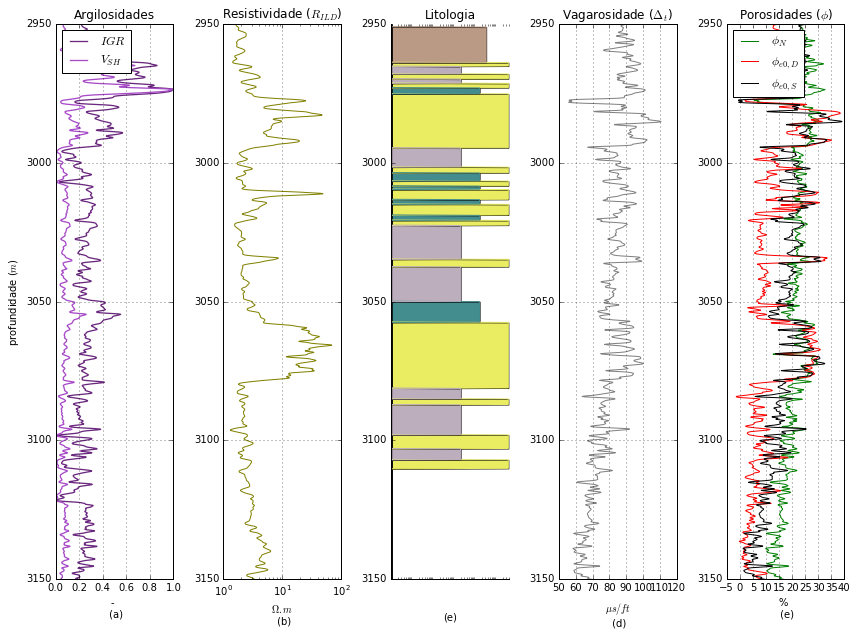

In [3]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')

#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='red',label='$\phi_{e0,D}$')
#ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Black'  ,label='$\phi_{e0,S}$')
#ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font></center>
<br>
<br>
<br>Augusto1 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.63 - 9.82 \phi_{e,D} - 2.25 V_{sh} + 0.08 R_{ILD}$
<br> $+ 4.06 (\phi_{e,D}. V_{sh}) -0.22 (\phi_{e,D} . R_{ILD}) + 1.92 \times 10^{-3} (V_{sh} . R_{ILD})$ 
<br> $+ 17.18 \phi_{e,D}^2 + 1.26 V_{sh}^2 - 2.66 \times 10^{-4} R_{ILD}^2 $
<br>
<br>Augusto2 - $V_p(\phi_{e,D},V_{sh}) = 4.47 - 4.01 \phi_{e,D} - 1.20 V_{sh} $

rP  = 0.792475966207 |mP  = 418.790275721 |stdP  = 280.405003602
rE1 = 0.859275514681 |mE1 = 200.283402979 |stdE1 = 178.24517938
rE2 = 0.760604028247 |mE2 = 269.262982381 |stdE2 = 207.951116659

rNA02 0.725157778867
rNA04 0.792975331783
rNA07 0.791284548732
rNA12 0.79900944944
rNA37 0.737346103628
rRJS42 0.515853613943


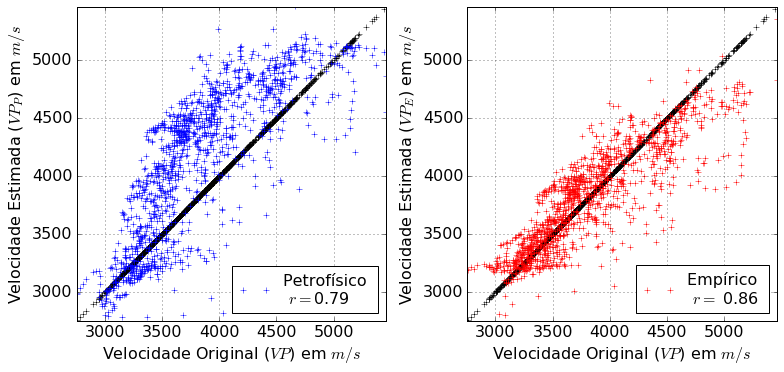

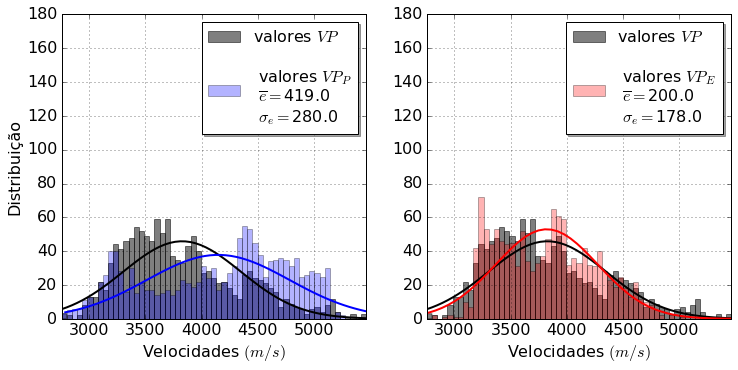

In [4]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
pet = u"- Petrofísico"; emp = u"- Empírico";petp = name1+pet;empp = name1+emp # nomeclatura
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[];errorP = []
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)*((PHIed0[i]/100.0)+(VSH[i]*(PHIs0/100.0))));DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0));errorP.append(abs(VP[i]-VPp0));VPp.append(VPp0)

print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[];VPe2=[];VPe_02=[];VPe_04=[];VPe_07=[];VPe_12=[];VPe_37=[];VPe_RJS42=[];errorE1=[];errorE2=[]

for i in range (p): # determinando VPa em ms
    VPe01=(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) + (4.06*(PHIed1[i]/100)*VSH[i]) 
    - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) + (17.18*((PHIed1[i]/100)**2))
    + (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))));errorE1.append(abs(VP[i]-VPe01));VPe1.append(VPe01)
    VPe02=(1000*(4.47 -(4.01*PHIed1[i]/100.0) - (1.20*VSH[i])));errorE2.append(abs(VP[i]-VPe02));VPe2.append(VPe02)
    VPe_02.append(1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))
    VPe_07.append(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
    + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)))
    VPe_12.append(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
    + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
    VPe_37.append(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))))
    VPe_04.append(1000*(4.80 - (8.20*PHIed1[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed1[i]/100.0)*VSH[i]) 
    + (10.42*((PHIed1[i]/100)**2)) + (2.57*VSH[i]**2)))
    VPe_RJS42.append(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
    + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
    + (15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))

print('rE1 =',np.corrcoef(VP,VPe1)[0,1],'|mE1 =',np.mean(errorE1),'|stdE1 =',np.std(errorE1))
print('rE2 =',np.corrcoef(VP,VPe2)[0,1],'|mE2 =',np.mean(errorE2),'|stdE2 =',np.std(errorE2));print();
print('rNA02',np.corrcoef(VP,VPe_02)[0,1]);print('rNA04',np.corrcoef(VP,VPe_04)[0,1]);
print('rNA07',np.corrcoef(VP,VPe_07)[0,1]);print('rNA12',np.corrcoef(VP,VPe_12)[0,1]);
print('rNA37',np.corrcoef(VP,VPe_37)[0,1]);print('rRJS42',np.corrcoef(VP,VPe_RJS42)[0,1])
#-----------------------------------------------------Graficos--------------------------------------------------#
fig = plt.figure(figsize= (11,10))

scatterP='Petrofísico \n $r=$'+str(round(np.corrcoef(VP,VPp)[0,1],2));
scatterE='Empírico \n $r =$ '+str(round(np.corrcoef(VP,VPe1)[0,1],2))

ax1=plt.subplot(221);ax1.plot(VP,VP,'+k');ax1.plot(VP,VPp,'+b',label=scatterP);legend=ax1.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Original ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_P$) em $m/s$',fontsize=16)
plt.grid()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2=plt.subplot(222);ax2.plot(VP,VP,'+k');ax2.plot(VP,VPe1,'+r',label=scatterE)
legend=ax2.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP));
plt.xlabel('Velocidade Original ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_E$) em $m/s$',fontsize=16);plt.grid()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
fig.tight_layout()

plt.show()
#----------------------------------------------------Histograma-------------------------------------------------#
bins_s=60;bins_vp = np.linspace(min(VP), max(VP), bins_s)

label_hist_e = '\n valores $VP_E$ \n $\overline{e} =$'+str(round(np.mean(errorE1))) \
+'\n $\sigma_e =$'+str(round(np.std(errorE1)));label_hist_p = '\n valores $VP_P$ \n $\overline{e} =$' \
+str(round(np.mean(errorP)))+'\n $\sigma_e =$'+str(round(np.std(errorP)))
#-----------------------------------------------------------------------------------------------------#
X_VP  = np.linspace(min(VP), max(VP),bins_s)
dx_VP = np.histogram(VP ,bins=bins_vp)[1][1] - np.histogram(VP ,bins=bins_vp)[1][0]
Y_VP  = mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),np.sqrt(np.var(VP)))*len(VP)*dx_VP
#-------------------------------------------------------------------------------------------------------------#
X_VPe  = np.linspace(min(VPe1), max(VPe1),bins_s)
dx_VPe = np.histogram(VPe1,bins=bins_vp)[1][1] - np.histogram(VPe1 ,bins=bins_vp)[1][0]
Y_VPe  = mlab.normpdf(np.linspace(min(VPe1),max(VPe1),bins_s),np.mean(VPe1),np.sqrt(np.var(VPe1)))*len(VPe1)*dx_VPe
#-------------------------------------------------------------------------------------------------------------#
X_VPp  = np.linspace(min(VPp), max(VPp),bins_s)
dx_VPp = np.histogram(VPp ,bins=bins_vp)[1][1] - np.histogram(VPp ,bins=bins_vp)[1][0]
Y_VPp  = mlab.normpdf(np.linspace(min(VPp),max(VPp),bins_s),np.mean(VPp),np.sqrt(np.var(VPp)))*len(VPp)*dx_VPp
#-------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.hist(VP,bins_vp,histtype='bar',stacked=True,color='k',alpha=0.5,label='valores $VP$')
ax1.plot(X_VP,Y_VP,linewidth=2,color='k')
ax1.hist(VPp , bins_vp, histtype='bar', stacked=True, color='b', alpha=0.3,label=label_hist_p)
ax1.plot(X_VPp,Y_VPp,linewidth = 2, color='b')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.ylabel('Distribuição',fontsize=16);plt.grid()
plt.xlim(xmax=max(VP),xmin=min(VP));
plt.ylim(ymax=180,ymin=0);legend = ax1.legend(loc=1, shadow=True,fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2 = plt.subplot(222)
ax2.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.5,label='valores $VP$')
ax2.plot(X_VP ,Y_VP ,linewidth = 2, color='k')
ax2.hist(VPe1 , bins_vp, histtype='bar', stacked=True, color='r', alpha=0.3,label=label_hist_e)
ax2.plot(X_VPe,Y_VPe,linewidth = 2, color='r')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=180,ymin=0)
legend = ax2.legend(loc=1, shadow=True,fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

plt.show()

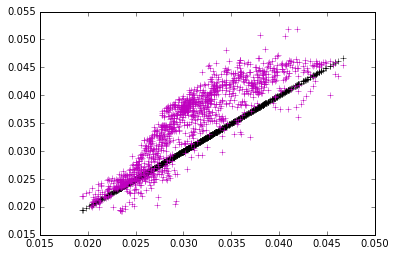

30889.771978 29564.1735898 30851.539343


In [5]:
DTPau = []

for i in range (p):
    DTP0 = 1.00/(VPe1[i])
    DTPau.append(DTP0/cfvp)

feet = 3.28084

Dtma = 169.0/feet
Dtsh = 396.0/feet
Dtf  = 564.0/feet

Pma = 2.65
Psh = 2.40
Pf  = 1.10

Zkm = []
Zrb = []
Z   = []
Zau = []

z  = []
zp = []
ze = []

for i in range(p):
    
    Z.append(RHOb[i]/DTP[i]) # Impedancia Observada
    
    # Constantes
    KKK = ((Psh - Pma)/(Pf - Pma))-((Dtsh - Dtma)/(Dtf - Dtma))
    p1 = Pf - Pma
    t1 = Dtf - Dtma
    
    Zkm0=(1.00/DTP[i])*((((VSH[i]*KKK)+ (DTP[i] - Dtma)/t1)*p1)+Pma) # Kamel e Mabrouk
    Zkm.append(Zkm0)                                                 # Kamel e Mabrouk
    
    Zrb.append(RHOb[i]/(t1*(((RHOb[i] - Pma)/p1) - VSH[i]*KKK) + Dtma)) # Kamel e Mabrouk sem VP
    
    Zau0 = RHOb[i]/DTPau[i] # Impedancia Augusto
    Zau.append(Zau0)        # Impedancia Augusto
    
    z.append((RHOb[i]/DTP[i])*(10**(6))) # Impedancia em ft/sec.g/cm3
    zp.append(Zkm0*(10**(6)))            # Impedancia Augusto em ft/sec.g/cm3
    ze.append(Zau0*(10**(6)))            # Impedancia Kamel em ft/sec.g/cm3


plt.plot(Z,Z,'+k')
plt.plot(Z,Zrb,'+m') # Kamel e Mabrouk sem VP
plt.show()
print (np.mean(z),np.mean(zp),np.mean(ze))


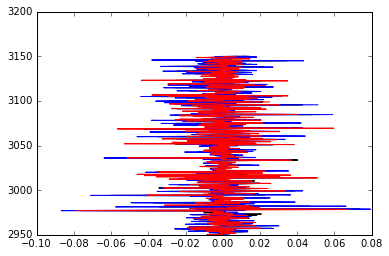

In [6]:
#-----------------------------------------------Refletividades---------------------------------------------------#
R = [];Rp = [];Re = [] # Refletividades

for i in range (p):
    if i == 0:
        RR = 0;RRp= 0;RRe= 0
    if i != 0:
        RR = (z[i-1] - z[i])/(z[i-1] + z[i])
        RRp= (zp[i-1] - zp[i])/(zp[i-1] + zp[i])
        RRe= (ze[i-1] - ze[i])/(ze[i-1] + ze[i])
    R.append(RR);Rp.append(RRp);Re.append(RRe)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1);plt.plot(Rp,prof,'-b',linewidth = 1);
plt.plot(Re,prof,'-r',linewidth = 1);plt.show()

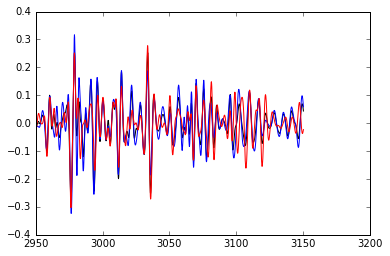

In [7]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];To = [];Tp = [];Te = [];f = 600

for i in range (p):
    To.append(DL/VP[i]);Tp.append(DL/VPp[i]);Te.append(DL/VPe1[i])
    
TTT = np.cumsum(To);TTP = np.cumsum(Tp);TTE = np.cumsum(Te)

signal = []
for j in range (p):
    wavk = []
    for i in range (len(TTT)):
        EE1 = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0 = R[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EE1);wavk.append(wav0)
    FXO1 = np.sum(wavk)
    signal.append(FXO1)
    
signalp = []
for j in range (p):
    wavkp = []
    for i in range (len(TTP)):
        EE1p = -(np.pi**2)*(f**2)*((TTP[j] - TTP[i])**2)
        wav0p = Rp[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTP[j] - TTP[i])**2))*np.exp(EE1p);wavkp.append(wav0p)
    FXO1p = np.sum(wavkp)
    signalp.append(FXO1p)
    
signale = []
for j in range (p):
    wavke = []
    for i in range (len(TTE)):
        EE1e = -(np.pi**2)*(f**2)*((TTE[j] - TTE[i])**2)
        wav0e = Re[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTE[j] - TTE[i])**2))*np.exp(EE1e);wavke.append(wav0e)
    FXO1e = np.sum(wavke)
    signale.append(FXO1e)
    
plt.plot(prof,signal ,'-k');plt.plot(prof,signalp,'-b');plt.plot(prof,signale,'-r');plt.show()

5339.22897876


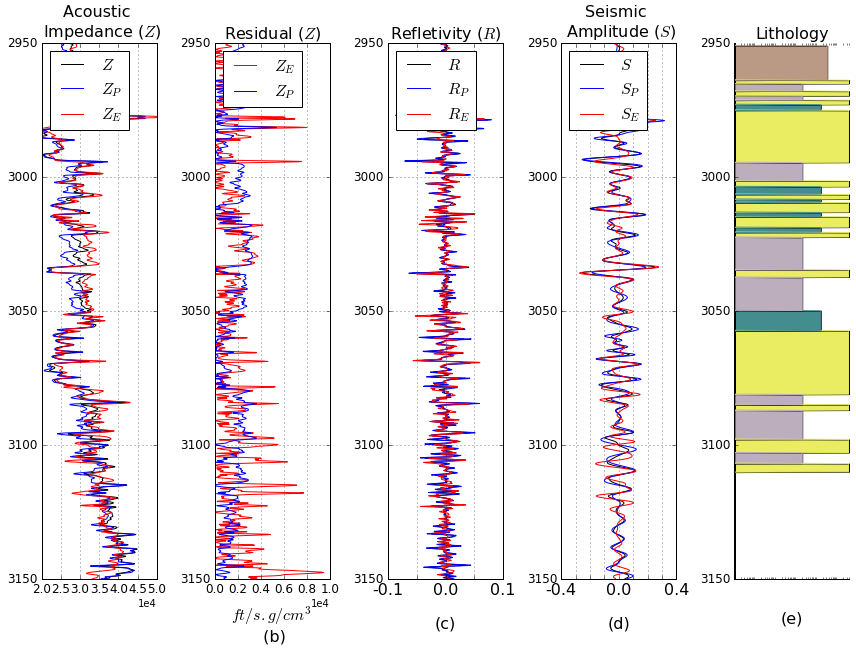

In [8]:
resp = [] # residuo kamel e mabrouk
rese = [] # residuo augusto

for i in range (p):
    resp.append(abs(z[i]-zp[i]))
    rese.append(abs(z[i]-ze[i]))
    
print (max(resp))
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(z  ,prof,'-k',linewidth = 1,label='$Z$')
ax1.plot(zp,prof,'-b',linewidth = 1,label='$Z_{P}$')
ax1.plot(ze,prof,'-r',linewidth = 1,label='$Z_{E}$')         

ax1.set_title('Acoustic \n Impedance ($Z$)',fontsize=16);ax2.set_xlabel('$ft/s.g/cm^3$ \n (b)',fontsize=16)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=50000,xmin=20000);ax1.invert_yaxis();ax1.grid()
ax1.legend(loc=2,fontsize=16)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x

#ax1.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax2.plot(rese,prof,'-r',linewidth = 1,label='$Z_{E}$')
ax2.plot(resp,prof,'-b',linewidth = 1,label='$Z_{P}$')

ax2.set_title('Residual ($Z$)',fontsize=16);ax2.set_xlabel('$ft/s.g/cm^3$ \n (b)',fontsize=16)
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=10000,xmin=0);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2,fontsize=16)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax2.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$') ;ax3.plot(Rp,prof,'-b',linewidth = 1,label='$R_{P}$') 
ax3.plot(Re,prof,'-r',linewidth = 1,label='$R_{E}$');ax3.set_title('Refletivity ($R$)',fontsize=16)
ax3.set_xlabel('(c)',fontsize=16);ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2,fontsize=16)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xticklabels([-0.1," ",0.0," ",0.1])
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$') ;ax4.plot(signalp,prof,'-b',linewidth = 1,label='$S_P$')
ax4.plot(signale,prof,'-r',linewidth = 1,label='$S_E$');ax4.set_title('Seismic \n Amplitude ($S$)',fontsize=16)
ax4.set_xlabel('(d)',fontsize=16);ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2,fontsize=16)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=12)
ax4.set_xticklabels([-0.4," "," "," ",0.0," "," "," ",0.4," "])
#--------------------------------------------------------------------------------------------------#
ax5.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax5.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax5.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax5.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax5.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe');ax5.fill_betweenx(prof, arem, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt, facecolor='#bb9a85');ax5.fill_betweenx(prof, shal, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu, facecolor='#6fb5db');ax5.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax5.set_title('Lithology',fontsize=16);ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=0.4,xmin=0)
ax5.invert_yaxis();ax5.spines['right'].set_visible(False);ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left');ax5.axes.get_xaxis().set_ticks([]);ax5.set_xlabel('(e)',fontsize=16)
ax5.xaxis.set_label_coords(0.5, -0.06)
ax5.tick_params(axis='x', labelsize=16)
ax5.tick_params(axis='y', labelsize=12)

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

De todos os poços em que ambos os perfis (densidade e sônico) estavam presentes, o poço RJS19 é o que consideramos com a melhor correlação entre os resultados. Neste poço, AUGUSTO utilizou duas equações empíricas:

Augusto1 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.63 - 9.82 \phi_{e,D} - 2.25 V_{sh} + 0.08 R_{ILD}$
 $+ 4.06 (\phi_{e,D}. V_{sh}) -0.22 (\phi_{e,D} . R_{ILD}) + 1.92 \times 10^{-3} (V_{sh} . R_{ILD})$ 
 $+ 17.18 \phi_{e,D}^2 + 1.26 V_{sh}^2 - 2.66 \times 10^{-4} R_{ILD}^2 $

Augusto2 - $V_p(\phi_{e,D},V_{sh}) = 4.47 - 4.01 \phi_{e,D} - 1.20 V_{sh} $

de modo que utilizamos a primeira devido ao alto coeficiente de correlação (0.86). A imagem XXX (a) mostra claramente a influência da litologia na impedãncia observada, onde as espessas camadas de arenito apresentaram baixos valores de impedância nas profundidades de 2990 e 3075 m. Onde a litologia predominante é marga (3025 m), o erro absoluto entre os modelos tende a ser similar, de modo que $Z_{KM}$ tende a subestimar valores de impedância e $Z_{e}$ tende a superestimar. Quanto ao perfil de resíduos (FIGURA XXX (b)), novamente podemos observar que, quando a litologia predominante é o arenito, o valor tende a ser baixo. 

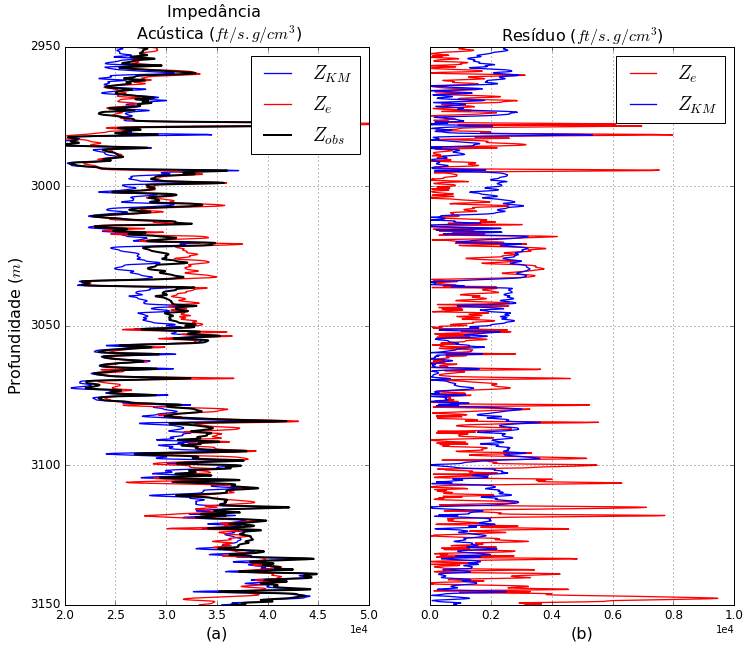

In [12]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2) = plt.subplots(1,2);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(zp,prof,'-b',linewidth = 1.3,label='$Z_{KM}$')
ax1.plot(ze,prof,'-r',linewidth = 1.3,label='$Z_{e}$')
ax1.plot(z ,prof,'-k',linewidth = 2,label='$Z_{obs}$')

ax1.set_ylabel('Profundidade ($m$)',fontsize=16)

ax1.set_title('Impedância \n Acústica ($ft/s.g/cm^3$)',fontsize=16);ax1.set_xlabel('(a)',fontsize=16)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=50000,xmin=20000);ax1.invert_yaxis();ax1.grid()
ax1.legend(loc=1,fontsize=19)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax1.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax2.plot(rese,prof,'-r',linewidth = 1.3,label='$Z_{e}$' )
ax2.plot(resp,prof,'-b',linewidth = 1.3,label='$Z_{KM}$')

ax2.set_title('Resíduo ($ft/s.g/cm^3$)',fontsize=16);ax2.set_xlabel('(b)',fontsize=16)
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=10000,xmin=0);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=1,fontsize=19)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax2.set_yticklabels([])
#ax2.set_xticklabels([" ",6," ",10," ",14])

plt.show()
name_sca_0 = 'dissertacao/rjs'+name0+'perfil1.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

LEG - (a) Variações dos valores de $Z$ em profundidade e (b) respectivos resíduos para o poço RJS19.

A comparação entre os perfis da figura XXX mostra que as amplitudes sísmicas conseguem identificar as interfaces para o topo e a base da primeira grande camada de arenito (2975 e 2990 m respectivamente), e a pequena camada de arenito inserida entre duas camadas espessas de marga (próximo a 3037 m) mas não consegue identificar o topo e a base da segunda camada espessa de arenito (próximo a 3075 m). Quanto a comparação entre os modelos ($S_{KM}$ e $S_{e}$) ambos parecem apresentar resultados bem próximos ao valor de $S_{obs}$.

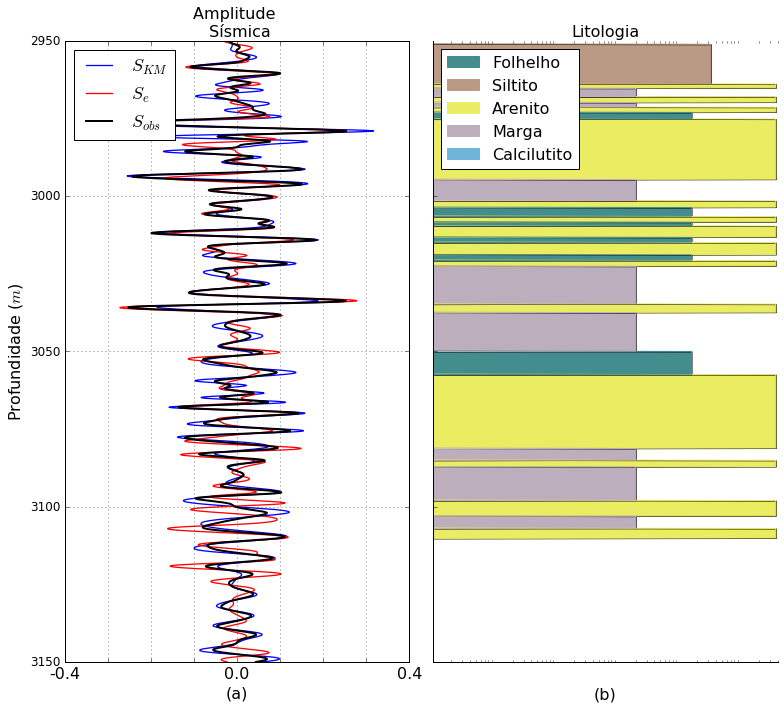

In [13]:
#--------------------------------------------------------------------------------------------------#
fig, (ax4, ax5) = plt.subplots(1,2);fig.set_size_inches(11, 11)
#--------------------------------------------------------------------------------------------------#

ax4.plot(signalp,prof,'-b',linewidth = 1.3,label='$S_{KM}$')
ax4.plot(signale,prof,'-r',linewidth = 1.3,label='$S_e$')
ax4.plot(signal ,prof,'-k',linewidth = 2,label='$S_{obs}$')
ax4.set_title('Amplitude \n Sísmica',fontsize=16)
ax4.set_xlabel('(a)',fontsize=16);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2,fontsize=18)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=12)
ax4.set_xticklabels([-0.4," "," "," ",0.0," "," "," ",0.4," "])
#ax4.set_yticklabels([])

ax4.set_ylabel('Profundidade ($m$)',fontsize=16)
#--------------------------------------------------------------------------------------------------#
ax5.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax5.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax5.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax5.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax5.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe');ax5.fill_betweenx(prof, arem, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt, facecolor='#bb9a85');ax5.fill_betweenx(prof, shal, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu, facecolor='#6fb5db');ax5.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax5.set_title('Litologia',fontsize=16);ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=0.4,xmin=0)
ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])
ax5.set_xlabel( '(b)',fontsize=16)
ax5.xaxis.set_label_coords(0.5, -0.04)
ax5.tick_params(axis='x', labelsize=16)
ax5.tick_params(axis='y', labelsize=12)

lab_a = mpatches.Patch(label='Folhelho'   ,color='#438d8e')
lab_b = mpatches.Patch(label='Siltito'    ,color='#bb9a85')
lab_c = mpatches.Patch(label='Arenito'    ,color='#eaec61')
lab_d = mpatches.Patch(label='Marga'      ,color='#bdaebe')
lab_e = mpatches.Patch(label='Calcilutito',color='#6fb5db')
ax5.set_yticklabels([])

ax5.legend(handles=[lab_a,lab_b,lab_c,lab_d,lab_e], loc=2, fontsize=16)

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()
#--------------------------------------------------------------------------------------------------#
name_sca_0 = 'dissertacao/rjs'+name0+'perfil2.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

(a) Amplitude sísmica e (b) litologia do poço RJS19.

Dentre todos os poços analisados, o RJS19 é o que apresenta melhores resultados quanto a correlação, com valores muito próximos de 1 para os coeficientes de ambos os modelos. $Z_{KM}$ tende a apresentar valores sutilmente subestimados, enquanto que $Z_{e}$ apresenta uma maior dispersão. 

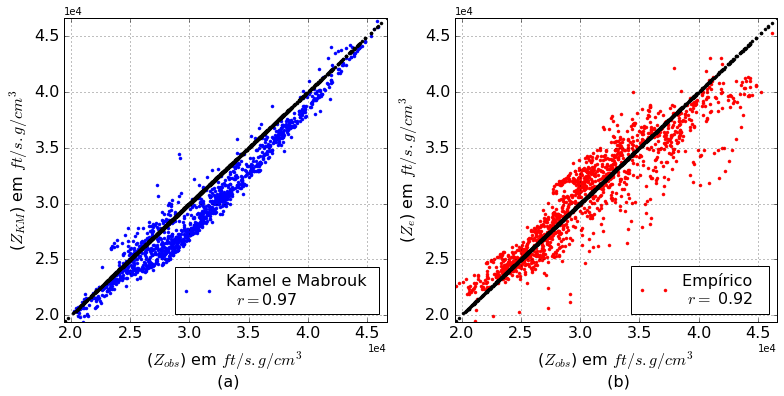

In [14]:
#-----------------------------------------------------Graficos--------------------------------------------------#

fig = plt.figure(figsize= (11,10))
scatterP='Kamel e Mabrouk \n  $r=$'+str(round(np.corrcoef(z,zp)[0,1],2)) # Legendas!
scatterE='Empírico  \n $r =$ '+str(round(np.corrcoef(z,ze)[0,1],2)) # Legendas

ax1=plt.subplot(221)

ax1.plot(z,zp,'.b',label=scatterP);legend=ax1.legend(loc=4,fontsize=16)
ax1.plot(z,z,'.k')

ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # ordem de grandeza x

plt.xlim(xmax=max(z),xmin=min(z));plt.ylim(ymax=max(z),ymin=min(z))
plt.xlabel('($Z_{obs}$) em $ft/s.g/cm^3$ \n (a)',fontsize=16)
plt.ylabel('($Z_{KM}$) em $ft/s.g/cm^3$',fontsize=16)
plt.grid()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x

ax2=plt.subplot(222)

ax2.plot(z,ze,'.r',label=scatterE)
ax2.plot(z,z,'.k')

ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # ordem de grandeza x

legend=ax2.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(z),xmin=min(z));plt.ylim(ymax=max(z),ymin=min(z));

plt.ylabel('($Z_e$) em $ft/s.g/cm^3$',fontsize=16);plt.grid()
plt.xlabel('($Z_{obs}$) em $ft/s.g/cm^3$ \n (b)',fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
fig.tight_layout()

plt.show();
name_sca_0 = 'dissertacao/rjs'+name0+'scatterplot.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

(a) Gráficos de dispersão de $Z_{obs}$ (cruz preta) por $Z_{KM}$ (cruz azul) e (b) $Z_{obs}$ (cruz preta) por $Z_{e}$ (cruz vermelha) para o poço RJS19 do campo de namorado. Os valores em $r$ representam o coeficiente de correlação entre $Z_{obs}$ e seus respectivos modelos. (quanto mais próximo de 1.0, melhor a correlação)